In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 定义参数
r = 2.0  # 半径
d = r / np.sqrt(2) # 网格间距
k = 30 # 采样点数
width = 20 # 画布宽度
height = 16 # 画布高度
nx = int(width / d) + 1 # 网格数
ny = int(height / d) + 1 # 网格数

In [27]:
occupied = np.zeros((nx, ny))

In [28]:
occupied_coord = np.zeros((nx, ny, 2))

In [29]:
active_list = [] # 激活集
sampled = [] # 采样

In [30]:
# 5 * 5  网格
relative = np.array([[-1, 2], [0, 2], [1, 2],
                     [-2, 1], [-1, 1], [0, 1], [1, 1], [2, 1],
                     [-2, 0], [-1, 0], [1, 0], [2, 0],
                     [-2, -1], [-1, -1], [0, -1], [1, -1], [2, -1],
                     [-1, -2], [0, -2], [1, -2]])

In [31]:
np.random.seed(0)

In [32]:
# 生成初始点
x, y = np.random.rand() * width, np.random.rand() * height
# 初始点网格坐标
idx_x, idx_y = int(x / d), int(y / d)
print(idx_x, idx_y)

7 8


In [33]:
# 在occupied中标记初始点已经被占据
occupied[idx_x, idx_y] = 1

In [34]:
# 并记录最初始的坐标
occupied_coord[idx_x, idx_y] = (x, y)

In [35]:
# 初始点加入激活集合和采样集合
active_list.append((x, y))
sampled.append((x, y))

In [36]:
# 开始采样
sampled_idx = 0
while len(active_list) > 0:
    # 从激活集合中随机采样一个点
    # 取到随机采样的索引
    idx = np.random.choice(len(active_list))
    # 取到随机采样的点
    ref_x, ref_y = active_list[idx]
    # 生成随机的k个半径属于（r, 2r)
    radius = (np.random.rand(k) + 1) * r
    # 生成随机的k个极角属于（0，2π）
    theta = np.random.rand(k) * 2 * np.pi
    # 生成以ref_x, ref_y为中心的k个半径为r，极角为theta的圆上的一堆点
    candidate = ref_x + radius * np.cos(theta), ref_y + radius * np.sin(theta)
    # 一个点的标记，用于标记这个中心点是否需要移除激活集合
    flag_out = False
    
    # print(candidate)
    
    # candidate是一个np.array
    # *candidate将每个np.array变为list
    # 遍历所有采样点,进行判定
    for _x, _y in zip(*candidate):
        if _x < 0 or _x > width or _y < 0 or _y > height:
            continue
        # 先将这点标记为可以添加
        flag = True
        # 采样点的网格坐标
        idx_x, idx_y = int(_x / d), int(_y / d)
        # 如果已经采样过continue
        if(occupied[idx_x, idx_y] == 1):
            continue
        else:
            # 没有采样过，只需要判断 5*5 范围内的网格点即可，其他点不用判断了
            neighbors = relative + np.array([idx_x, idx_y])
        # 遍历5 * 5 范围内的网格点坐标
        for cand_x, cand_y in neighbors:
            if cand_x < 0 or cand_x > width or cand_y < 0 or cand_y > height:
                continue
            # 如果这个网格里有点
            if occupied[cand_x, cand_y] == 1:
                # 取出网格中点的具体坐标
                cand_coord = occupied_coord[cand_x, cand_y]
                # 判断该店与中心点的距离是否小于r
                if (_x - cand_coord[0]) ** 2 + (_y - cand_coord[1]) ** 2 < r ** 2:
                    # 小于r则标记为不可添加
                    flag = False
                    break
        
        if flag:
            # 这个点可以添加
            # 那么中心点没必要移除激活集合
            flag_out = True
            occupied[idx_x, idx_y] = 1
            occupied_coord[idx_x, idx_y] = (_x, _y)
            sampled.append((_x, _y))
            active_list.append((_x, _y))
            sampled_idx += 1
            break
    # 中心点需要移除激活集合
    if not flag_out:
        active_list.pop(idx)
    
    

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
fig.set_tight_layout(True)
ax.scatter(*zip(*sampled), c='g')
ax.set_xlim([0, width])
ax.set_ylim([0, height])
plt.show()

IndexError: index 12 is out of bounds for axis 1 with size 12

(array([ 9.43395482,  9.57201335, 12.39001486,  9.7598591 ,  9.88075214,
        9.57253696, 12.81855326, 10.40158444,  9.8384556 ,  9.56548208,
       10.4695762 , 12.76563853, 10.44133523, 10.45636386, 11.22761209,
       12.23976857, 10.2656893 ,  9.75101196,  9.18700561,  9.30933898,
       12.4338518 , 12.40318369, 11.26201096, 11.84356142, 10.32241616,
       10.93605379,  9.48838905, 11.02580854, 11.66075121, 12.34067112]), array([11.87905061, 10.79903679, 11.61071609, 10.33428653, 10.51217143,
       10.17482703, 10.76335044, 10.18459955, 12.82710241, 12.03226403,
        9.95910767, 12.15442494, 10.51514897, 10.48827982, 12.43180323,
       12.7704586 , 13.07303489, 12.85571808, 10.59836235, 12.12001749,
       11.3363647 , 12.50801892, 12.52418195, 12.83484403, 10.50508967,
       13.38728289, 11.76276784, 12.85682417, 12.50632026, 12.57718813]))
(array([ 9.43395482,  9.57201335, 12.39001486,  9.7598591 ,  9.88075214,
        9.57253696, 12.81855326, 10.40158444,  9.8384556 ,

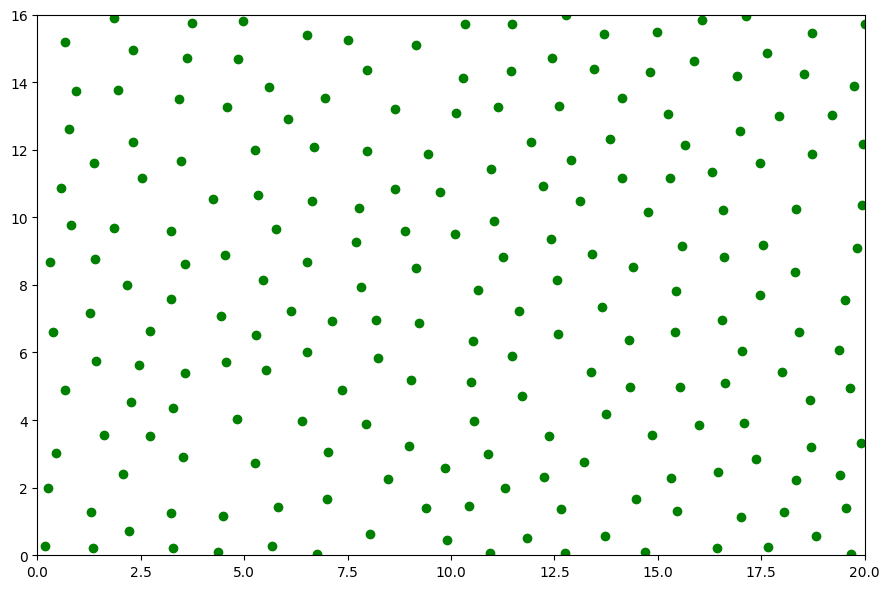

In [64]:
import numpy as np
import matplotlib.pyplot as plt

r = 1.0
d = r / np.sqrt(2)
k = 30
width = 20
height = 16
nx = int(width / d) + 1
ny = int(height / d) + 1

occupied = np.zeros((nx, ny))
occupied_coord = np.zeros((nx, ny, 2))
active_list = []
sample_list = []

relative = np.array([[-2, 2], [-1, 2], [0, 2], [1, 2], [2, 2],
                     [-2, 1], [-1, 1], [0, 1], [1, 1], [2, 1],
                     [-2, 0], [-1, 0], [1, 0], [2, 0],
                     [-2, -1], [-1, -1], [0, -1], [1, -1], [2, -1],
                     [-2, -2], [-1, -2], [0, -2], [1, -2], [2, -2]])

np.random.seed(0)
x, y = np.random.rand() * width, np.random.rand() * height
idx_x, idx_y = int(x / d), int(y / d)
occupied[idx_x, idx_y] = 1
occupied_coord[idx_x, idx_y] = (x, y)
active_list.append((x, y))
sample_list.append((x, y))

# 计数
sampled_idx = 0

while len(active_list) > 0:
    
    # 取激活集一个点，随机生成它周围的k个点
    idx = np.random.choice(len(active_list))
    ref_x, ref_y = active_list[idx]
    radius = (np.random.rand(k) + 1) * r
    theta = np.random.rand(k) * 2 * np.pi
    candidate_x, candidate_y = ref_x + radius * np.cos(theta), ref_y + radius * np.sin(theta)
    print(candidate)
    
    flag_out = False
    
    # k个点中的一个点确定了为_x,_y，开始检查它周围的点， 看这个点是否可以放进去集合中
    for _x, _y in zip(candidate_x, candidate_y):
        #print(_x, _y)
        if _x < 0 or _x > width or _y < 0 or _y > height:
            continue
        flag = True
        # 该点网格坐标
        idx_x, idx_y = int(_x / d), int(_y / d)
        if(occupied[idx_x, idx_y] == 1):
            # 该网格已经有点了
            continue
        # 5 * 5 邻域
        else:
            neighbors = relative + np.array([idx_x, idx_y])
        
        # 检查这个点是否可以放进去
        for cand_x, cand_y in neighbors:
            if cand_x < 0 or cand_x >= nx or cand_y < 0 or cand_y >= ny:
                continue
            if occupied[cand_x, cand_y] == 1:
                cood = occupied_coord[cand_x, cand_y]
                if (_x - cood[0]) ** 2 + (_y - cood[1]) ** 2 < r ** 2:
                    flag = False
                    break
        
        if flag:
            # 中心点周围有满足条件的点，不用弹出
            flag_out = True
            occupied[idx_x, idx_y] = 1
            occupied_coord[idx_x, idx_y] = (_x, _y)
            active_list.append((_x, _y))
            sample_list.append((_x, _y))
            sampled_idx += 1
            break
    if not flag_out:
        active_list.pop(idx)
                
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
fig.set_tight_layout(True)
ax.scatter(*zip(*sampled), c='g')
ax.set_xlim([0, width])
ax.set_ylim([0, height])
plt.show()          

In [60]:
candidate = (np.array([ 9.43395482,  9.57201335, 12.39001486,  9.7598591 ,  9.88075214,
        9.57253696, 12.81855326, 10.40158444,  9.8384556 ,  9.56548208,
       10.4695762 , 12.76563853, 10.44133523, 10.45636386, 11.22761209,
       12.23976857, 10.2656893 ,  9.75101196,  9.18700561,  9.30933898,
       12.4338518 , 12.40318369, 11.26201096, 11.84356142, 10.32241616,
       10.93605379,  9.48838905, 11.02580854, 11.66075121, 12.34067112]), 
             np.array([11.87905061, 10.79903679, 11.61071609, 10.33428653, 10.51217143,
       10.17482703, 10.76335044, 10.18459955, 12.82710241, 12.03226403,
        9.95910767, 12.15442494, 10.51514897, 10.48827982, 12.43180323,
       12.7704586 , 13.07303489, 12.85571808, 10.59836235, 12.12001749,
       11.3363647 , 12.50801892, 12.52418195, 12.83484403, 10.50508967,
       13.38728289, 11.76276784, 12.85682417, 12.50632026, 12.57718813])
             )
print(next(zip(*candidate)))

# (9.43395482, 11.87905061)

(9.43395482, 11.87905061)


In [63]:
count = 0
for x ,y in zip(*candidate):
    count += 1
    print(x,y)
    
print(count)

9.43395482 11.87905061
9.57201335 10.79903679
12.39001486 11.61071609
9.7598591 10.33428653
9.88075214 10.51217143
9.57253696 10.17482703
12.81855326 10.76335044
10.40158444 10.18459955
9.8384556 12.82710241
9.56548208 12.03226403
10.4695762 9.95910767
12.76563853 12.15442494
10.44133523 10.51514897
10.45636386 10.48827982
11.22761209 12.43180323
12.23976857 12.7704586
10.2656893 13.07303489
9.75101196 12.85571808
9.18700561 10.59836235
9.30933898 12.12001749
12.4338518 11.3363647
12.40318369 12.50801892
11.26201096 12.52418195
11.84356142 12.83484403
10.32241616 10.50508967
10.93605379 13.38728289
9.48838905 11.76276784
11.02580854 12.85682417
11.66075121 12.50632026
12.34067112 12.57718813
30
